<a href="https://colab.research.google.com/github/sanket0708/AI_ML_Codes/blob/main/SupervisedAndUnsupervised/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [29]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [30]:
m = len(x_train)
print(m)

2


In [31]:
i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


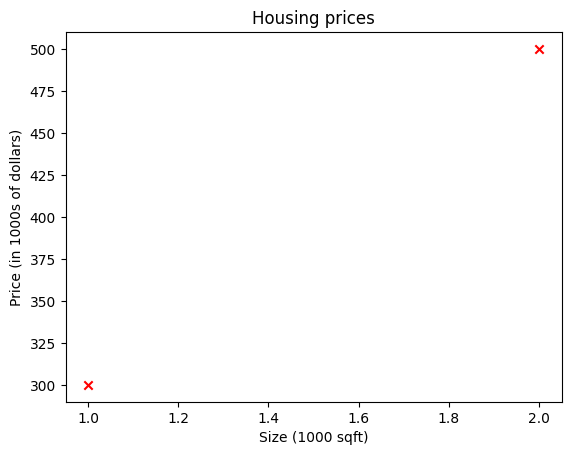

In [32]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title('Housing prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

**Let's try to get a better intuition for this through the code blocks below. assume w=200 and b=100**


In [33]:
w = 200
b = 100

In [34]:
def compute_model_output(x,w,b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w*x[i]+b

  return f_wb

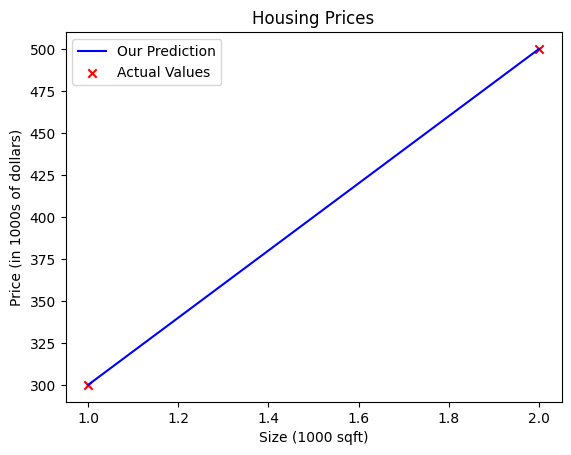

In [35]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

If we make w=100 and b=100 blue line will not fit our data as straight as shown above

In [36]:
x_i = 1.2
cost_100sqft = w*x_i+b
print(f"${cost_100sqft:.0f} thousand dollars")

$340 thousand dollars


In [39]:
def compute_cost(x,y,w,b):
  m = x.shape[0]

  cost_sum = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum = cost_sum + cost
  total_cost = (1/(2*m)) * cost_sum

  return total_cost

# **Lets start gradient descent **


In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [4]:
def compute_cost(x,y,w,b):
  m = x.shape[0]

  cost = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i]) ** 2
  total_cost = (1/(2*m)) * cost

  return total_cost

In [5]:
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i]+b
    dj_dw_i = (f_wb-y[i])*x[i]
    dj_db_i = f_wb-y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw,dj_db


In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [9]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


In [10]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


# Practicing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([800,1000,1200],dtype=float)
y = np.array([150,180,210],dtype=float)

X_s = X / 1000.0

m = X_s.shape[0]
print("m (examples):", m)
print("X_s:", X_s)
print("y:", y)


m (examples): 3
X_s: [0.8 1.  1.2]
y: [150. 180. 210.]


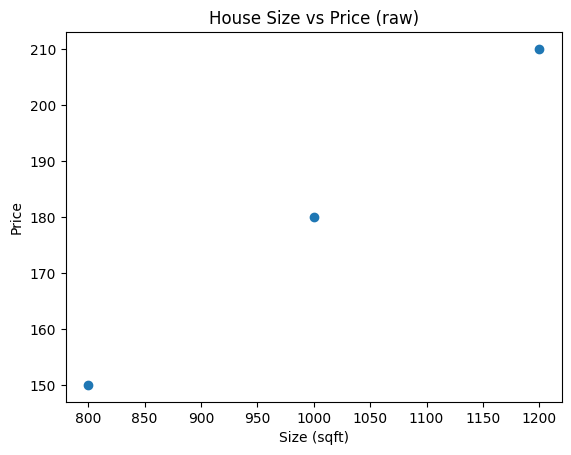

In [3]:
plt.scatter(X,y)
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.title("House Size vs Price (raw)")
plt.show()

In [4]:
def compute_cost(x,y,w,b):
  m = x.shape[0]

  cost = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i]) ** 2
  total_cost = (1/(2*m)) * cost

  return total_cost

def f_wb(x,w,b):
  return w*x+b

def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i]+b
    dj_dw_i = (f_wb-y[i])*x[i]
    dj_db_i = f_wb-y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw,dj_db


In [5]:
w , b = 0.0 , 0.0

print("predictions with w=0,b=0:", f_wb(X_s, w, b))
print("errors:", f_wb(X_s, w, b) - y)
print("cost J:", compute_cost(X_s, y, w, b))
dj_dw, dj_db = compute_gradient(X_s, y, w, b)
print("dj_dw:", dj_dw, "dj_db:", dj_db)

predictions with w=0,b=0: [0. 0. 0.]
errors: [-150. -180. -210.]
cost J: 16500.0
dj_dw: -184.0 dj_db: -180.0


In [6]:
w, b = 150.0, 30.0
print("preds:", f_wb(X_s, w, b))
print("cost:", compute_cost(X_s, y, w, b))


preds: [150. 180. 210.]
cost: 0.0


In [18]:
def gradient_descent(X, y, w, b, alpha=0.1, iters=200, verbose=True):
    J_hist = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J = compute_cost(X, y, w, b)
        J_hist.append(J)
        if verbose and (i % 20 == 0 or i == iters-1):
            print(f"iter {i:03d}: cost={J:.6f}, w={w:.6f}, b={b:.6f}, dj_dw={dj_dw:.6f}, dj_db={dj_db:.6f}")
    return w, b, J_hist

w0, b0 = 0.0, 0.0
w_opt, b_opt, J_hist = gradient_descent(X_s, y, w0, b0, alpha=0.2, iters=1500)
print("Final w, b:", w_opt, b_opt)


iter 000: cost=5916.776533, w=36.800000, b=36.000000, dj_dw=-184.000000, dj_db=-180.000000
iter 020: cost=41.802966, w=94.193318, b=86.552098, dj_dw=-0.747192, dj_db=0.744971
iter 040: cost=37.594996, w=97.078326, b=83.632000, dj_dw=-0.702780, dj_db=0.712213
iter 060: cost=33.810615, w=99.812555, b=80.861072, dj_dw=-0.666470, dj_db=0.675416
iter 080: cost=30.407176, w=102.405519, b=78.233304, dj_dw=-0.632037, dj_db=0.640520
iter 100: cost=27.346333, w=104.864516, b=75.741302, dj_dw=-0.599382, dj_db=0.607427
iter 120: cost=24.593601, w=107.196467, b=73.378051, dj_dw=-0.568415, dj_db=0.576044
iter 140: cost=22.117964, w=109.407937, b=71.136899, dj_dw=-0.539047, dj_db=0.546283
iter 160: cost=19.891529, w=111.505150, b=69.011536, dj_dw=-0.511197, dj_db=0.518059
iter 180: cost=17.889211, w=113.494009, b=66.995982, dj_dw=-0.484786, dj_db=0.491293
iter 200: cost=16.088450, w=115.380112, b=65.084563, dj_dw=-0.459739, dj_db=0.465910
iter 220: cost=14.468957, w=117.168769, b=63.271899, dj_dw=-0.

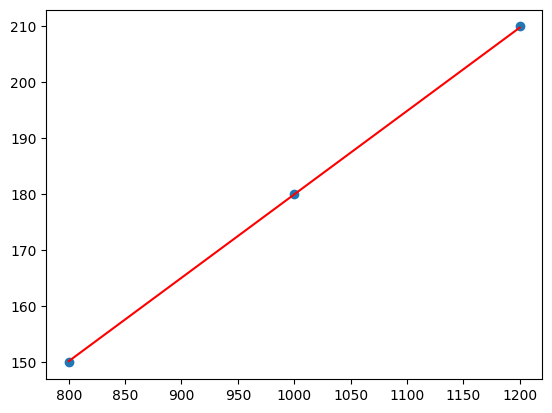

In [25]:
plt.scatter(X, y, label='data')
x_line = np.linspace(X.min(), X.max(), 100)
y_line = f_wb(x_line / 1000.0, w_opt, b_opt)   # use scaled x in model
plt.plot(x_line, y_line, color='red')
# plt.xlabel("Size (sqft)"); plt.ylabel("Price"); plt.legend(); plt.show()
